# Backprop in Numpy: Training MLP to classify MNIST

1: Training for activation relu and LR 0.008000
Epoch 0: average cost: -1.5326 training accuracy: 0.6879 validation accuracy: 0.7027
Epoch 1: average cost: -0.6502 training accuracy: 0.7382 validation accuracy: 0.7532
Epoch 2: average cost: -0.4529 training accuracy: 0.8920 validation accuracy: 0.9058
Epoch 3: average cost: -0.3478 training accuracy: 0.9107 validation accuracy: 0.9209
Epoch 4: average cost: -0.2960 training accuracy: 0.9203 validation accuracy: 0.9269
Epoch 5: average cost: -0.2698 training accuracy: 0.9244 validation accuracy: 0.9312
Epoch 6: average cost: -0.2523 training accuracy: 0.9318 validation accuracy: 0.9387
Epoch 7: average cost: -0.2285 training accuracy: 0.9368 validation accuracy: 0.9419
Epoch 8: average cost: -0.2145 training accuracy: 0.9414 validation accuracy: 0.9452
Epoch 9: average cost: -0.1983 training accuracy: 0.9437 validation accuracy: 0.9474
Epoch 10: average cost: -0.1901 training accuracy: 0.9380 validation accuracy: 0.9412
Epoch 11: averag

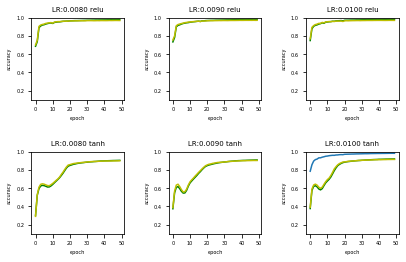

In [8]:
# Backprop in Numpy: Training MLP to classify MNIST

import h5py
import math
import numpy as np
import matplotlib.pyplot as plt
import random


def d_relu(y):
    for i in range(0,y.shape[0]):
        for j in range(0,y.shape[1]):
            if y[i][j]>0:
                y[i][j] = 1
            else:
                y[i][j] = 0
    return y

def Tanh(x):
    return np.tanh(x), 1-np.tanh(x)**2

def ReLU_vector(y):
    for i in range(0,y.shape[0]):
        for j in range(0,y.shape[1]):
            y[i][j]=max(0,y[i][j])
    return y

def Softmax(x):
    return np.exp(x - x.max(axis=0))/(np.exp(x -  x.max(axis=0))+e).sum(axis = 0)

file = h5py.File('mnist_traindata.hdf5', 'r')
list(file.keys())
X_train = file['xdata'][:50000]/255
Y_train = file['ydata'][:50000]

X_val = file['xdata'][50000:60000]/255
Y_val = file['ydata'][50000:60000]

w1 = np.random.randn(48,784)
b1 = np.random.randn(48,1)

w2 = np.random.randn(10,48)
b2 = np.random.randn(10,1)

reg_val = 0.0001

learning_rate = 0.01

for i in range(1):
    k = np.arange(50000)
    np.random.shuffle(k)
    X_train = X_train[k]
    Y_train = Y_train[k]
    for j in range(999):
        Y_epoch = np.array(Y_train[j*50:(j+1)*50])
        a0 = np.array(X_train[j*50:(j+1)*50])
        Z1 = np.dot(w1,a0.T) + b1
        A1 = ReLU_vector(Z1)
        Z2 = np.dot(w2,A1) + b2
        Z2_t = np.transpose(Z2)
        output = []
        for j in range(Z2_t.shape[0]):
            temp = Softmax(Z2_t[j])
            output.append(temp)

        dA2 = (output - (np.array(Y_train[j*50:(j+1)*50])))
        dw2 = np.dot(A1,dA2)
        db2 = np.sum(np.transpose(dA2), axis=1, keepdims=True)
        w2 = w2 - np.transpose((learning_rate/50) * dw2) 
        b2 = b2 - (learning_rate/50) * db2

        A1_dot = d_relu(A1)
        dA1 = np.dot(w2.T, dA2.T)
        d1 = np.multiply(A1_dot,dA1)
        dw1 = np.dot(d1,a0)
        db1 = np.sum(d1, axis=1, keepdims=True)

        w1 = w1 - (learning_rate/50) *(dw1) 

        b1 = b1 - (learning_rate/50) * db1
    Z1 = np.dot(X_train,w1.T) + b1
    A1 = ReLU_vector(Z1)

    Z2 = np.dot(A1,w2) + b2
    Z2_t = np.transpose(Z2)
    output = []
    for j in range(Z2_t.shape[0]):
        temp = Softmax(Z2_t[j])
        output.append(temp)


    count = 0
    temp1 = np.array(output)
    for k in range(len(output)):
        temp2 = np.argmax(output[k])
        temp3 = np.argmax(Y_train[k])
        if temp2==temp3:
            count += 1
    print("epoch:",i," acc:",count/len(Y_train))

a0 = np.array(X_train)
Z1 = np.dot(a0,w1.T) + b1
A1 = ReLU_vector(Z1)

Z2 = np.dot(A1,w2) + b2
Z2_t = np.transpose(Z2)
output = []
for j in range(Z2_t.shape[0]):
    temp = Softmax(Z2_t[j])
    output.append(temp)


count = 0
temp1 = np.array(output)
for k in range(len(output)):
    temp2 = np.argmax(output[k])
    temp3 = np.argmax(Y_train[k])
    if temp2==temp3:
        count += 1
print("epoch:",i," acc:",count/len(Y_train))
